In [1]:
import math
import numpy
import time
import matplotlib.pyplot as plt

1.) The following code - block 2

NOTE: Algorithm 1 (alg1) represents Algorithm 0.1 (A Procedure for Computing the Transitive Closure). Algorithm 2 (alg2) represents Algorithm 0.2 (Warshall Algorithm).


In [2]:
# n = the length and width of the matrix
n=4

Mr = numpy.random.randint(2, size=(n, n))

# The following line of code allows the results of matrix multiplipaction to remain binary.
Mr = Mr.astype(bool)

# multiplying the matrix by 1 converts the matrix from printing True/False to zero-one.
print("Starting Matrix Mr:\n", 1*Mr)


def alg1():
    A = Mr
    B = A
    
# using the given pseudocode "for i := 2 to n" was not consistently producing the correct transitive closure for me, but this version did.
    for i in range(1, n):   
        A = (numpy.dot(A,B))
        B = (B | A)
    return 1*B
print("\n\nTransitive closure of Matrix Mr using Algorithm 1:\n", alg1())

def alg2():
    W = Mr

    # The given pseudocode for this algorithm also produced inconsistencies.
    for k in range(n):
        for i in range(n):
            for j in range(n):
                        W[i, j] = ( W[i, j]) | (W[i, k] & W[k, j])
    return 1*W
print("\n\nTransitive closure of Matrix Mr using Algorithm 2:\n",alg2())

Starting Matrix Mr:
 [[1 0 0 1]
 [1 1 0 0]
 [0 1 0 1]
 [1 0 1 1]]


Transitive closure of Matrix Mr using Algorithm 1:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


Transitive closure of Matrix Mr using Algorithm 2:
 [[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


2a) The following code - blocks 3 and 4

In [3]:
# These arrays hold the average execution times for both algorithms.
alg1Times = [0] * 10
alg2Times = [0] * 10

n = 10

for p in range(0,10):

    Mr = numpy.random.randint(2, size=(n, n))
    Mr = Mr.astype(bool)
    totalTime1 = 0
    totalTime2 = 0
    print("Starting Matrix (", n,"by", n, "):\n", 1*Mr, "\n")
    for v in range (0, 10):
        def alg1():
            A = Mr
            B = A

            # using the given pseudocode "for i := 2 to n" was not consistently producing the correct transitive closure, but this altered version did.
            for i in range(1, n):   
                A = (numpy.dot(A,B))
                B = (B | A)
            return 1*B

        start_time1 = time.perf_counter()
        result1 = alg1()
        end_time1 = time.perf_counter()
        
        # print("Algorithm 1:\n", result1)
        
        ExecTime1 = end_time1 - start_time1
        totalTime1 += ExecTime1
    
        alg1Times[p] = round (ExecTime1, 6)
        print(f"Algorithm 1 Execution Time: {ExecTime1:.8f} seconds", "\n")


        def alg2():
            W = Mr

        # The given pseudocode for this algorithm also produced inconsistencies.
            for k in range(n):
                for i in range(n):
                    for j in range(n):
                        W[i, j] = ( W[i, j]) | (W[i, k] & W[k, j])
            return 1*W

        start_time2 = time.perf_counter()
        result2 = alg2()
        end_time2 = time.perf_counter()
        
        # print("Algorithm 2:\n", result2)
        
        ExecTime2 = end_time2 - start_time2
        totalTime2 += ExecTime2
        alg2Times[p] = round (ExecTime2, 6)
        print(f"Algorithm 2 Execution Time: {ExecTime2:.8f} seconds", "\n---------------------------------------\n\n")
    
    alg1Avg = totalTime1/10
    alg2Avg = totalTime2/10
    alg1Times[p] = round (alg1Avg, 6)
    print(f"Average Algorithm 1 Execution Time: {alg1Avg:.8f} seconds", "\n\n\n")
    alg2Times[p] = round (alg2Avg, 6)
    print(f"Average Algorithm 2 Execution Time: {alg2Avg:.8f} seconds", "\n---------------------------------------\n----------------------------------------\n\n\n")
    n += 10


Starting Matrix ( 10 by 10 ):
 [[1 1 0 0 0 1 1 0 1 1]
 [1 1 1 1 1 0 1 0 1 0]
 [1 0 0 0 1 0 1 0 0 0]
 [0 1 1 0 1 0 0 0 1 1]
 [1 0 0 1 1 1 1 0 0 0]
 [0 0 1 0 1 1 0 0 1 0]
 [0 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 1 0 1 0 0 0]
 [1 0 1 1 0 0 1 1 1 0]] 

Algorithm 1 Execution Time: 0.00058700 seconds 

Algorithm 2 Execution Time: 0.00175500 seconds 
---------------------------------------


Algorithm 1 Execution Time: 0.00009250 seconds 

Algorithm 2 Execution Time: 0.00099940 seconds 
---------------------------------------


Algorithm 1 Execution Time: 0.00019290 seconds 

Algorithm 2 Execution Time: 0.00184730 seconds 
---------------------------------------


Algorithm 1 Execution Time: 0.00041880 seconds 

Algorithm 2 Execution Time: 0.00162650 seconds 
---------------------------------------


Algorithm 1 Execution Time: 0.00012020 seconds 

Algorithm 2 Execution Time: 0.00183840 seconds 
---------------------------------------


Algorithm 1 Execution Time: 0.00014960 se

[0.000207, 0.000201, 0.000654, 0.001238, 0.002091, 0.002729, 0.004042, 0.005695, 0.007418, 0.010089] 
 [0.001526, 0.007991, 0.027191, 0.066801, 0.120189, 0.217075, 0.335631, 0.484026, 0.730731, 0.941798]


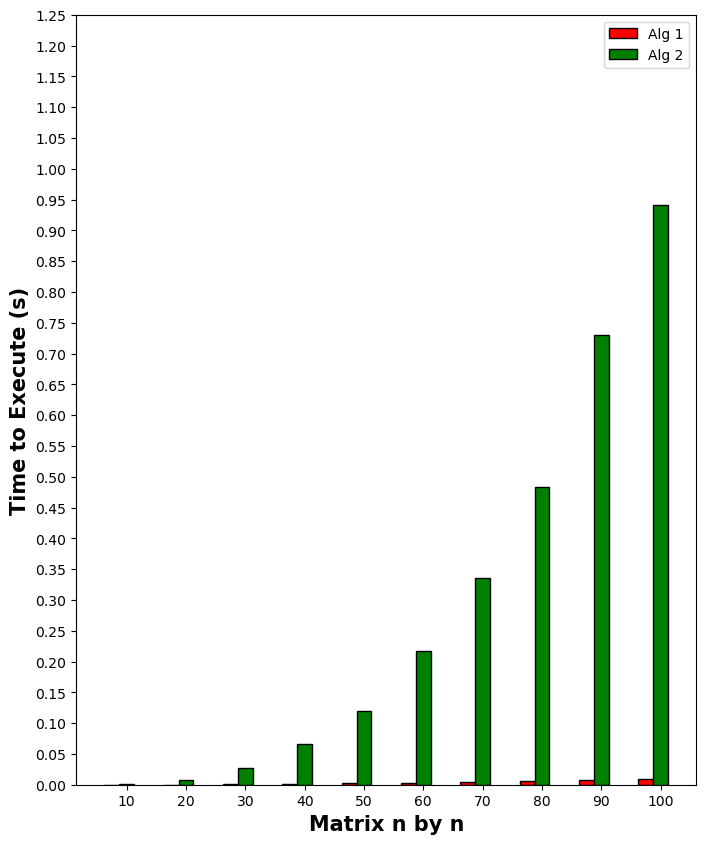

In [4]:
# The following block of code produces the graph of the average execution time of the algorithms above.

print(alg1Times, "\n", alg2Times)

barWidth = .25
plt.subplots(figsize =(8, 10))
# Set position of bar on X axis
br1 = numpy.arange(len(alg1Times))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 

plt.bar(br1, alg1Times, color ='r', width = barWidth,
        edgecolor ='black', label ='Alg 1')
plt.bar(br2, alg2Times, color ='g', width = barWidth,
        edgecolor ='black', label ='Alg 2')

 

plt.xlabel('Matrix n by n', fontweight ='bold', fontsize = 15)
plt.ylabel('Time to Execute (s)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(alg1Times))], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20, 
            0.25, 0.30, 0.35, 0.40, 0.45,
            0.50, 0.55, 0.60, 0.65, 0.70, 
            0.75, 0.80, 0.85, 0.90, 0.95, 
            1.00, 1.05, 1.10, 1.15, 1.20, 1.25])
 
plt.legend()
plt.show()

2b)
The results from part 2a indicate that Algorithm 0.1 is significantly faster at computing the transitive closure of a matrix. The time it takes for Algorithm 0.2 (Warshall's Algorithm) to execute increases dramatically each time the value of n increases. While I am aware that Warshall's Algorithm is more efficient than Algorithm 0.1, the way I coded Algorithm 0.2 could easily lead someone to think that is not the case. When comparing these two algorithms, Algorithm 0.1 would be prefereble to use when a faster execution time is desireable.

3) The following code - block 5

In [5]:
n=4
Mr = numpy.random.randint(2, size=(n, n))
Mr = Mr.astype(bool)
 
print("Matrix Mr:\n\n", 1*Mr)


def alg1():
    A = Mr
    B = A
    for i in range(1, n):   
        A = (numpy.dot(A,B))
        B = (B | A)
    
    BR = B 
    for i in range(n):
        BR[i][i] = 1
    return 1*B, 1*BR
X, Y = alg1()
print("\n\n\nAlgorithm 1:\n")
print("Transitive closure of Matrix Mr:\n", X)
print("\nReflexive Transitive closure of Matrix Mr:\n", Y)

def alg2():
    W = Mr

    for k in range(n):
        for i in range(n):
            for j in range(n):
                        W[i, j] = ( W[i, j]) | (W[i, k] & W[k, j])
    
    
    WR = W
    for i in range(n):
        WR[i][i] = 1
    
    return 1*W, 1*WR

X, Y = alg2()
print("\n\n-----------------------------\n\nAlgorithm 2:\n")
print("Transitive closure of Matrix Mr:\n", X,)
print("\nReflexive Transitive closure of Matrix Mr:\n", Y)


Matrix Mr:

 [[1 1 1 1]
 [1 1 1 0]
 [0 0 0 0]
 [0 0 1 0]]



Algorithm 1:

Transitive closure of Matrix Mr:
 [[1 1 1 1]
 [1 1 1 1]
 [0 0 1 0]
 [0 0 1 1]]

Reflexive Transitive closure of Matrix Mr:
 [[1 1 1 1]
 [1 1 1 1]
 [0 0 1 0]
 [0 0 1 1]]


-----------------------------

Algorithm 2:

Transitive closure of Matrix Mr:
 [[1 1 1 1]
 [1 1 1 1]
 [0 0 1 0]
 [0 0 1 1]]

Reflexive Transitive closure of Matrix Mr:
 [[1 1 1 1]
 [1 1 1 1]
 [0 0 1 0]
 [0 0 1 1]]
